# MLP Implementation


In [290]:
import random 
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

class MLP():

    def __init__(self, num_inputs, num_hidden, num_outputs):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        self.activation_func = {"sigmoid": "sigmoid", 
                                "tanh": "tanh", 
                                "linear":"linear",
                                "softmax":"softmax"}
        self.activation_deriv = {"sig_deriv": "sig_deriv", 
                                 "tanh_deriv": "tanh_deriv", 
                                 "linear_deriv":"linear_deriv",
                                 "softmax_deriv":"softmax_deriv"}
    
    #methods to call the activation functions 
    def call_activation(self, func_name, x):
        return getattr(self, self.activation_func[func_name])(x)
    
    def call_derivative(self, func_name, x):
        return getattr(self, self.activation_deriv[func_name])(x)
    
    #randomise method to create initial weights and initialize weight changes as zeros
    def randomise(self):
        
        self.weights_lower = np.random.uniform((-1/math.sqrt(self.num_inputs)), (1/math.sqrt(self.num_inputs)), (self.num_hidden, self.num_inputs))
        self.weights_upper = np.random.uniform((-1/math.sqrt(self.num_hidden)), (1/math.sqrt(self.num_hidden)), (self.num_outputs, self.num_hidden))
        
        self.weight_changes_lower = np.zeros([self.num_hidden, self.num_inputs])
        self.weight_changes_upper = np.zeros([self.num_outputs, self.num_hidden])
        
     
    #Forward pass method 
    def forward(self, input_vector, activation_hidden, activation_output):
        
        self.input_vector = input_vector
        self.activations_lower = np.dot(self.weights_lower, self.input_vector)
        self.hidden_neurons = self.call_activation(activation_hidden, self.activations_lower)
        self.activations_upper = np.dot(self.weights_upper, self.hidden_neurons)
        self.outputs = self.call_activation(activation_output, self.activations_upper)

        return self.outputs
        
    #Backwards propagation method
    def backwards(self, target, activation_deriv_hidden, activation_deriv_output):
        self.target = target

        #compute Output layer error and upper layer deltas
        if activation_deriv_output == "softmax_deriv":
            self.error = -np.sum(self.target*np.log(self.outputs))
            self.upper_delta = (self.outputs - self.target)
        else:
            self.error = (self.target - self.outputs)
            self.upper_delta = (self.error * self.call_derivative(activation_deriv_output, self.activations_upper))

        #Update upper layer weight changes
        for i in range(self.num_outputs):
            for j in range(self.num_hidden):
                self.weight_changes_upper[i][j] += self.upper_delta[i]*self.hidden_neurons[j]
       
        #compute lower layers deltas
        self.lower_delta = np.zeros([self.num_hidden])
        for j in range(self.num_hidden):
            for i in range(self.num_outputs):
                self.lower_delta[j] += (self.weights_upper[i][j]*self.upper_delta[i])*self.call_derivative(activation_deriv_hidden, self.activations_lower[j])
        
        #Update lower layer weight changes
        for i in range(self.num_hidden):
            for j in range(self.num_inputs):
                self.weight_changes_lower[i][j] += self.lower_delta[i]*self.input_vector[j]

        return self.error 
   
    #method to apply the weight changes form the back propagation and reinitialize
    def update_weights(self, learning_rate):
        self.learning_rate = learning_rate
        
        for i in range(self.num_outputs):
            for j in range(self.num_hidden):
                self.weights_upper[i][j] += (self.learning_rate)*self.weight_changes_upper[i][j]
                self.weight_changes_upper[i][j] = 0
                
        for i in range(self.num_hidden):
            for j in range(self.num_inputs):
                self.weights_lower[i][j] += (self.learning_rate)*self.weight_changes_lower[i][j]
                self.weight_changes_lower[i][j] = 0       

    #Activation functions to be called by call_activation and call_derivative           
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def sig_deriv(self, x):
        return self.sigmoid(x)*(1-self.sigmoid(x))
    
    def tanh(self, x):
        return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    
    def tanh_deriv(self, x):
        return 1-self.tanh(x)**2
    
    def linear(self,x):
        return x
    
    def linear_deriv(self,x):
        return 1 

    def softmax(self, x):
#         np.seterr(divide='ignore', invalid='ignore')
        x = np.float128(x)
        return np.exp(x) / np.sum(np.exp(x))


# Task 1

In [300]:
#function to perform training
def training(epochs, training_data, network, learning_rate, hidden_activation, output_activation, update_every):
    error_array=[]
    deriv_dict = {"sigmoid": "sig_deriv", "tanh": "tanh_deriv", "linear":"linear_deriv", "softmax":"softmax_deriv"}
    network.randomise()
    for i in range(1, epochs+1):
        error = 0
        for j in range(0, len(training_data)):
            network.forward(training_data[j][0], hidden_activation, output_activation)
            error += network.backwards(training_data[j][1], deriv_dict[hidden_activation], deriv_dict[output_activation])

            if j%update_every==0:
                network.update_weights(learning_rate)
                
        error_array.append(error)
        print("Error at epoch ",i," is ",error)
    
    return error_array

### Training the network

Error printouts attached in PDF file.

In [310]:
NN = MLP(2,4,1)
NN.randomise()

In [311]:
data_X = [[[0,0],0], [[0,1],1], [[1,0],1], [[1,1],0]]

In [312]:
training(epochs=100, training_data=data_X, network  = NN, learning_rate=0.3, hidden_activation="tanh", output_activation="linear", update_every=1)

Error at epoch  1  is  [1.99203558]
Error at epoch  2  is  [1.00476525]
Error at epoch  3  is  [0.69270744]
Error at epoch  4  is  [0.58617962]
Error at epoch  5  is  [0.54800892]
Error at epoch  6  is  [0.5274254]
Error at epoch  7  is  [0.51089736]
Error at epoch  8  is  [0.49524431]
Error at epoch  9  is  [0.479725]
Error at epoch  10  is  [0.46414872]
Error at epoch  11  is  [0.44846502]
Error at epoch  12  is  [0.43268223]
Error at epoch  13  is  [0.41685022]
Error at epoch  14  is  [0.40105056]
Error at epoch  15  is  [0.38538486]
Error at epoch  16  is  [0.36996215]
Error at epoch  17  is  [0.35488776]
Error at epoch  18  is  [0.34025516]
Error at epoch  19  is  [0.32614123]
Error at epoch  20  is  [0.31260471]
Error at epoch  21  is  [0.29968664]
Error at epoch  22  is  [0.28741221]
Error at epoch  23  is  [0.27579308]
Error at epoch  24  is  [0.26482964]
Error at epoch  25  is  [0.25451306]
Error at epoch  26  is  [0.24482689]
Error at epoch  27  is  [0.23574841]
Error at epoc

[array([1.99203558]),
 array([1.00476525]),
 array([0.69270744]),
 array([0.58617962]),
 array([0.54800892]),
 array([0.5274254]),
 array([0.51089736]),
 array([0.49524431]),
 array([0.479725]),
 array([0.46414872]),
 array([0.44846502]),
 array([0.43268223]),
 array([0.41685022]),
 array([0.40105056]),
 array([0.38538486]),
 array([0.36996215]),
 array([0.35488776]),
 array([0.34025516]),
 array([0.32614123]),
 array([0.31260471]),
 array([0.29968664]),
 array([0.28741221]),
 array([0.27579308]),
 array([0.26482964]),
 array([0.25451306]),
 array([0.24482689]),
 array([0.23574841]),
 array([0.22724962]),
 array([0.21929812]),
 array([0.21185793]),
 array([0.20489027]),
 array([0.19835439]),
 array([0.19220851]),
 array([0.18641074]),
 array([0.18092008]),
 array([0.17569736]),
 array([0.1707061]),
 array([0.16591324]),
 array([0.16128966]),
 array([0.15681043]),
 array([0.15245486]),
 array([0.14820629]),
 array([0.14405175]),
 array([0.1399814]),
 array([0.13598808]),
 array([0.13206

# Task 2

In [176]:
NN.forward([0,0], "tanh", "linear")

array([0.])

In [177]:
NN.forward([0,1], "tanh", "linear")

array([0.99971127])

In [178]:
NN.forward([1,0], "tanh", "linear")

array([0.99961093])

In [179]:
NN.forward([1,1], "tanh", "linear")

array([-0.00011753])

# Task 3

### Setting up the training and test data

In [474]:
training_data = []
for i in range(0,500):
    input_array = [random.uniform(-1, 1),random.uniform(-1, 1),random.uniform(-1, 1),random.uniform(-1, 1)]
    output = math.sin(input_array[0] - input_array[1] + input_array[2] - input_array[3])
    example = [input_array,output]
    training_data.append(example)

In [475]:
train_set = training_data[0:400]

In [476]:
test_set = training_data[400:500]

### Training the network

Error printouts attached in PDF file.

In [477]:
NN = MLP(4,5,1)

In [478]:
x = training(epochs=200, training_data=train_set, network  = NN, learning_rate=0.1, hidden_activation="sigmoid", output_activation="linear", update_every=1)

Error at epoch  1  is  [-5.20612206]
Error at epoch  2  is  [-0.85871125]
Error at epoch  3  is  [-0.83576912]
Error at epoch  4  is  [-0.76259444]
Error at epoch  5  is  [-0.59560721]
Error at epoch  6  is  [-0.38239908]
Error at epoch  7  is  [-0.17295357]
Error at epoch  8  is  [0.00020953]
Error at epoch  9  is  [0.12511686]
Error at epoch  10  is  [0.20438348]
Error at epoch  11  is  [0.24747829]
Error at epoch  12  is  [0.26515558]
Error at epoch  13  is  [0.26667985]
Error at epoch  14  is  [0.25898867]
Error at epoch  15  is  [0.24682224]
Error at epoch  16  is  [0.23318966]
Error at epoch  17  is  [0.21986367]
Error at epoch  18  is  [0.20778981]
Error at epoch  19  is  [0.19738828]
Error at epoch  20  is  [0.18876247]
Error at epoch  21  is  [0.18183645]
Error at epoch  22  is  [0.17644239]
Error at epoch  23  is  [0.17237415]
Error at epoch  24  is  [0.16941878]
Error at epoch  25  is  [0.16737391]
Error at epoch  26  is  [0.16605643]
Error at epoch  27  is  [0.16530593]
Err

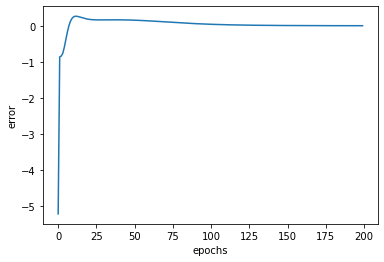

In [479]:
plt.plot(x)
plt.xlabel("epochs")
plt.ylabel("error")
plt.savefig('error1.png')

# Task 4


In [484]:
#function to get the difference between the actual value and predicted
#this difference is then appended to an array 
def difference_calc(data):
    difference_array = []
    for j in range(0, len(data)):
        
        predicted = NN.forward(data[j][0],"sigmoid","linear")
        actual = data[j][1]
        difference = actual - predicted 
        difference_array.append(difference)
    
    return difference_array

In [294]:
#function to split the array of differences from above into intervals and print the output
def errors(array):
    under_1 = []
    under_5 = []
    over_5 = []
    over_10 = []
    over_15 = []
    for item in array:
        item = abs(item)
        if item <= 0.01:
            under_1.append(item)
        elif item > 0.01 and item <=0.05:
            under_5.append(item)
        elif item > 0.05 and item <=0.1:
            over_5.append(item)
        elif item > 0.1 and item <=0.15:
            over_10.append(item) 
        else:
            over_15.append(item)
    
    print("//-----------------------------------------//")
    print("0 < error <= 0.01")
    print("count:", len(under_1))
    print("percentage of total:", len(under_1)/len(array))
    print("//-----------------------------------------//")
    print("0.01 < error <= 0.05")
    print("count:", len(under_5))
    print("percentage of total:", len(under_5)/len(array))
    print("//-----------------------------------------//")
    print("0.05 < error <= 0.1")
    print("count:", len(over_5))
    print("percentage of total:", len(over_5)/len(array))
    print("//-----------------------------------------//")
    print("0.1 < error <= 0.15")
    print("count:", len(over_10))
    print("percentage of total:", len(over_10)/len(array))
    print("//-----------------------------------------//")
    print("error > 0.15")
    print("count:", len(over_15))
    print("percentage of total:", len(over_15)/len(array))

### Test set differences 

In [504]:
items = difference_calc(test_set)
errors(items)

//-----------------------------------------//
0 < error <= 0.01
count: 15
percentage of total: 0.15
//-----------------------------------------//
0.01 < error <= 0.05
count: 60
percentage of total: 0.6
//-----------------------------------------//
0.05 < error <= 0.1
count: 22
percentage of total: 0.22
//-----------------------------------------//
0.1 < error <= 0.15
count: 1
percentage of total: 0.01
//-----------------------------------------//
error > 0.15
count: 1
percentage of total: 0.01


In [ ]:
#function to get the mean of the differences 
def meancalc(array):
    mean = []
    for item in array:
        item = abs(item)
        mean.append(item)
    print(sum(mean)/len(mean))

In [505]:
meancalc(items)

array([0.03812243])

### Training set differences 

In [506]:
items = difference_calc(train_set)
errors(items)

//-----------------------------------------//
0 < error <= 0.01
count: 55
percentage of total: 0.1375
//-----------------------------------------//
0.01 < error <= 0.05
count: 252
percentage of total: 0.63
//-----------------------------------------//
0.05 < error <= 0.1
count: 79
percentage of total: 0.1975
//-----------------------------------------//
0.1 < error <= 0.15
count: 7
percentage of total: 0.0175
//-----------------------------------------//
error > 0.15
count: 5
percentage of total: 0.0125


In [507]:
meancalc(items)

array([0.03741224])

# Special Test

### Setting up training and test data 

The input and target for each example were stored in seperate numpy arrays in order to increase the speed of the training, as numpy arrays allow for faster operations than lists. 

In [163]:
file_path = "letter-recognition.data"
letter_data = pd.read_csv(file_path, delimiter=",",header=None)

In [164]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
alphabet_dict = {}
for letter in alphabet:
    array = []
    for item in alphabet:
        if item == letter:
            array.append(1)
        else:
            array.append(0)   
    alphabet_dict[letter] = np.array(array)

In [165]:
target_array = letter_data.pop(0).to_numpy()

In [166]:
attr = letter_data.values

In [291]:
train_set_target = target_array[0:16000]
train_set_attributes = attr[0:16000]
test_set_target = target_array[16000:20000]
test_set_attributes = attr[16000:20000]

In [292]:
#New training function to account for seperate input and targets
def training_2(epochs, input_array, target, network, learning_rate, hidden_activation, output_activation, update_every):
    error_array=[]
    deriv_dict = {"sigmoid": "sig_deriv", "tanh": "tanh_deriv", "linear":"linear_deriv", "softmax":"softmax_deriv"}
    network.randomise()
    for i in range(1, epochs+1):
        error = 0
        for j in range(0, len(input_array)):
            network.forward(input_array[j], hidden_activation, output_activation)
            error += network.backwards(alphabet_dict[target_array[j]], deriv_dict[hidden_activation], deriv_dict[output_activation])

            if j%update_every==0:
                network.update_weights(learning_rate)
                
        error_array.append(error)
        print("Error at epoch ",i," is ",error)
    
    return error_array

### Training on subest 

Error printouts attached in pdf file.

In [287]:
sub_train_set_target = train_set_target[0:2000]
sub_train_set_attributes = train_set_attributes[0:2000]

In [288]:
NNtest = MLP(16,10,26)

In [296]:
x = training_2(epochs=1000, input_array=train_set_attributes, target=train_set_target, network = NNtest, learning_rate=0.001, hidden_activation="sigmoid", output_activation="linear", update_every=100)

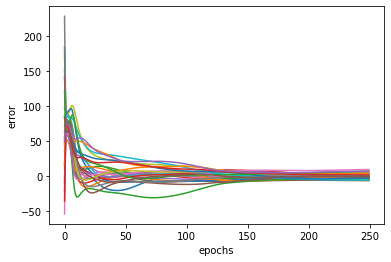

In [187]:
plt.plot(x)
plt.xlabel("epochs")
plt.ylabel("error")
plt.savefig('special_error1.png')

### Final training of the network

In [42]:
NN = MLP(16,10,26)

In [43]:
training_2(epochs=1000, input_array=train_set_attributes, target=train_set_target, network = NN, learning_rate=0.001, hidden_activation="sigmoid", output_activation="linear", update_every=100)

Error at epoch  1  is  [  69.29965315  -21.33235848  115.78187034   56.95311675   64.8442786
    2.7488445   -87.72688599   82.47508901  145.56700271 -282.77027814
  -24.73996376   27.7701797    60.60173309   70.65009531  134.10755245
  -45.88827524 -199.26883658  184.26693102  -87.09349235   41.00732164
  142.77607944 -331.10956333  -88.3932678   -98.20226408  112.58864995
  210.14521793]
Error at epoch  2  is  [ 57.1985604   20.09245794   6.6039794   16.86158119   7.17561726
  22.14411347  11.36507222  -4.074877     0.57345651  34.85422904
   3.27939486  25.30516415  16.32131871   0.1944989  -17.42469148
 -14.33830113  12.04828069  31.80380139  39.8189412  -16.36230696
   0.91804469 -35.15820221 -17.99863829  -7.27764536 -18.35385552
  42.73969338]
Error at epoch  3  is  [ 64.2253018   24.57540377  -8.05521916  13.89188572   1.10075416
  29.003336     9.75600137 -11.54526861  -8.77991812  28.78850503
  -4.41503996   5.90951318  11.54331355   2.67937422 -11.05748585
 -16.64555571   9.

Error at epoch  24  is  [18.86540405  1.33005465  2.41522954  3.48950717  0.70069411  3.75635863
 -1.57493047 -1.73128066  4.58417737 -8.5622449  -2.72175275 -4.98030477
  5.96399568  1.36411908  0.69191312 -1.58022081 -4.32400133  0.96110721
 -3.55494089  0.24266548  1.46733346 -1.55719035 -1.6316582  -1.5810524
 -1.65147932 -2.29284067]
Error at epoch  25  is  [17.12490691  1.28833108  2.10719208  3.27406629  0.59862793  3.44778455
 -1.52412592 -1.5297129   4.70801809 -8.52492006 -2.52439926 -4.55516453
  5.51310634  1.19242356  0.61216488 -1.41170546 -4.14186208  0.78885856
 -3.16240914  0.38162606  1.47609605 -1.62728614 -1.45323482 -1.50194611
 -1.66933441 -1.98228537]
Error at epoch  26  is  [15.485513    1.23219364  1.84519629  3.05081692  0.51703129  3.15062579
 -1.45433488 -1.34992427  4.74929096 -8.3708197  -2.34255571 -4.15995364
  5.08134339  1.05430895  0.54070142 -1.272271   -3.94204309  0.63642586
 -2.80685106  0.49643148  1.4614347  -1.65609388 -1.28036776 -1.40844215
 

Error at epoch  48  is  [-0.3221713   0.39791803 -0.32008109  0.19044664  0.40250984 -0.2212844
 -0.27712369 -0.29537336  1.28459714 -0.67744753 -0.249621   -0.00985457
  1.26657347  0.82704763  0.11629583 -0.03527614 -1.14290927  0.09562944
  0.01806674  0.07110079  0.07347206 -0.49409698  0.13014898 -0.39859327
 -0.43702318 -0.49375669]
Error at epoch  49  is  [-0.41703753  0.37158371 -0.19304309  0.34127326  0.21248812 -0.22925586
 -0.27145182 -0.17799696  1.29105835 -0.56446028 -0.32502925  0.00907047
  1.08264279  0.66985702  0.10525558 -0.01452146 -0.96295993  0.05520641
 -0.0648355   0.05431883  0.14111746 -0.43838176  0.20776182 -0.34169684
 -0.46258364 -0.33483073]
Error at epoch  50  is  [-0.56597011  0.34589195 -0.08848443  0.45976989  0.05560453 -0.28639516
 -0.25728366 -0.07747953  1.2830344  -0.44079934 -0.38173222  0.03659331
  0.92297992  0.54593209  0.10026026  0.00147246 -0.79331226  0.02205188
 -0.12663299  0.02767358  0.20100501 -0.36587574  0.29295125 -0.29087434
 

Error at epoch  72  is  [-1.73379010e+00  1.93561591e-01 -5.72437658e-01  5.01521574e-02
  2.12929560e-01 -7.07905247e-02 -3.96049730e-01 -3.86077945e-01
  9.17890929e-01  2.64788059e-01 -2.76854277e-01  2.70143865e-01
  8.67257142e-01  3.79364769e-01 -2.01822922e-01  8.77672970e-02
 -7.60489072e-01 -3.12035553e-02  5.62477314e-01  1.29396728e+00
 -4.29885855e-01 -8.87334615e-01 -3.50774468e-01 -1.20107838e-03
 -1.11942607e-01  6.29736674e-01]
Error at epoch  73  is  [-1.74199499  0.22694342 -0.5184536   0.12320504  0.14364388 -0.18250765
 -0.3412032  -0.32303474  0.83911829  0.29350978 -0.2640027   0.27264179
  0.79559056  0.37303988 -0.14502895  0.16814148 -0.67398961 -0.00743271
  0.52561162  1.08796367 -0.36616737 -0.78595218 -0.30774518 -0.00836018
 -0.10771292  0.49100692]
Error at epoch  74  is  [-1.7464558   0.25042062 -0.46140168  0.18162939  0.08576334 -0.26655346
 -0.28901942 -0.26404973  0.77111846  0.31911495 -0.24760681  0.27402598
  0.72785064  0.36352261 -0.09337486  0.

Error at epoch  96  is  [-1.40061851  0.16026755  0.05911867  0.11593158  0.00259265 -0.32391471
  0.07113313  0.07065162  0.2756948   0.49227218 -0.01329018  0.18115309
  0.01689277  0.14596592  0.13043262  0.27011963  0.0246464   0.03137791
 -0.00149767 -0.55215415  0.11536734  0.22563876  0.24441435 -0.03161642
 -0.07941271 -0.23966508]
Error at epoch  97  is  [-1.37843094  0.15332711  0.05984543  0.10457786  0.00556128 -0.31201045
  0.07307082  0.06977156  0.26425186  0.49585668 -0.01001205  0.17715446
 -0.00571822  0.13997963  0.12686979  0.2630489   0.02793646  0.03172611
 -0.01941267 -0.5387041   0.1138395   0.25109585  0.26325903 -0.03477831
 -0.07578431 -0.25305929]
Error at epoch  98  is  [-1.35677072  0.14599682  0.06005959  0.09404613  0.00760576 -0.29967672
  0.07449194  0.06890037  0.25364715  0.49891445 -0.00684623  0.17324223
 -0.02714664  0.13435132  0.12341329  0.25620629  0.03038273  0.03237539
 -0.03724197 -0.52263973  0.11219679  0.27455546  0.28061196 -0.03854263


Error at epoch  119  is  [-1.00067162  0.01711431  0.0249214   0.02025112 -0.03117818 -0.06012134
  0.02461805  0.04021972  0.21669802  0.45872764  0.00607738  0.10199317
 -0.14982762  0.07289227  0.06616955  0.1564439  -0.01803575  0.0340256
 -0.17368714 -0.14489369  0.0738323   0.31675009  0.28356909 -0.09495063
  0.02053427 -0.25965067]
Error at epoch  120  is  [-0.98684465  0.01571362  0.0231114   0.02076628 -0.03233811 -0.05270761
  0.02168715  0.03861956  0.21944278  0.45422471  0.00474964  0.09940646
 -0.14493207  0.07183769  0.06408422  0.15245735 -0.0207957   0.03335615
 -0.17026018 -0.13480355  0.07148259  0.30491608  0.27372649 -0.09404386
  0.01962769 -0.25064842]
Error at epoch  121  is  [-0.97324633  0.01465545  0.02133275  0.02136741 -0.03331138 -0.04572751
  0.01886751  0.03702704  0.22220609  0.44962726  0.00335265  0.09690365
 -0.13976951  0.07084017  0.06203059  0.14853364 -0.02341343  0.03266126
 -0.16649231 -0.125366    0.06908643  0.29284427  0.26383188 -0.0929234

Error at epoch  142  is  [-0.73737376  0.01454821 -0.00382472  0.02794255 -0.0289163   0.0274484
 -0.01674801  0.01011144  0.25344466  0.34578335 -0.02210454  0.05924357
 -0.04362063  0.05242313  0.02702208  0.0853021  -0.05262941  0.01507336
 -0.08349759 -0.0167554   0.02653217  0.09468619  0.11290918 -0.05442569
 -0.00512494 -0.08571909]
Error at epoch  143  is  [-0.72820718  0.01428707 -0.00429437  0.02769335 -0.02825184  0.02860189
 -0.01749516  0.0093565   0.25326166  0.34115246 -0.02259959  0.05798801
 -0.0407744   0.05168819  0.02595068  0.08310674 -0.05310889  0.01434189
 -0.08090934 -0.01425429  0.02540987  0.08931232  0.1089445  -0.05279603
 -0.00550704 -0.08117534]
Error at epoch  144  is  [-0.71919642  0.01398474 -0.00470538  0.02741255 -0.02758892  0.02962569
 -0.01817592  0.00865416  0.25295196  0.33659292 -0.02302356  0.05676954
 -0.03808008  0.05097832  0.02494204  0.08096786 -0.05352685  0.0136398
 -0.07846596 -0.01191849  0.0243735   0.0842548   0.10520633 -0.05121995

Error at epoch  166  is  [-0.5540279   0.00418786 -0.00519464  0.01899939 -0.01635784  0.03254031
 -0.02201222  0.00248974  0.22702477  0.25519667 -0.02126554  0.03710405
 -0.00576922  0.04088036  0.01450375  0.04505155 -0.05195841  0.005575
 -0.04998226  0.01056908  0.01536495  0.02611392  0.0601179  -0.02900301
 -0.01008973 -0.02851172]
Error at epoch  167  is  [-0.54779312  0.0038097  -0.00505252  0.01866014 -0.01603286  0.03222129
 -0.02189564  0.00245367  0.22544563  0.2522719  -0.0209496   0.03645039
 -0.00509136  0.04059548  0.01436033  0.04381861 -0.0515975   0.00546902
 -0.04938087  0.01077923  0.01527921  0.02493726  0.05908159 -0.02843743
 -0.01023362 -0.02762862]
Error at epoch  168  is  [-0.54165283  0.00344518 -0.00490875  0.01832953 -0.01572193  0.03188888
 -0.02176787  0.00242671  0.22386002  0.24940272 -0.02062939  0.03581188
 -0.00445377  0.04031901  0.01423079  0.04261331 -0.05122571  0.00537695
 -0.04881026  0.01095288  0.01520338  0.02383004  0.05809324 -0.02789812

Error at epoch  189  is  [-0.43186388 -0.00138045 -0.00235127  0.01316528 -0.01154517  0.02414952
 -0.0179989   0.00274385  0.19161835  0.19961739 -0.01421907  0.02515526
  0.00291757  0.03563244  0.01305823  0.02260417 -0.04259321  0.00522345
 -0.04091732  0.01007839  0.01440486  0.01059126  0.04432753 -0.02060488
 -0.01242618 -0.01797213]
Error at epoch  190  is  [-0.42743532 -0.00150212 -0.00226781  0.01298775 -0.01142192  0.02380796
 -0.01781206  0.00276701  0.19020119  0.19765182 -0.01395954  0.02475184
  0.00308991  0.0354381   0.01302754  0.02186039 -0.04219396  0.00525332
 -0.04064577  0.00994288  0.01436708  0.01024761  0.04387647 -0.02037775
 -0.01247645 -0.0177681 ]
Error at epoch  191  is  [-0.4230703  -0.00161658 -0.00218801  0.01281489 -0.01130294  0.02347161
 -0.01762679  0.00278933  0.18879762  0.19571625 -0.01370513  0.02435602
  0.00325256  0.03524512  0.01299671  0.02113227 -0.04179839  0.00528382
 -0.04037887  0.0098055   0.01432787  0.00991896  0.04343655 -0.020156

Error at epoch  213  is  [-0.34113727 -0.00282565 -0.00119891  0.00990269 -0.00938828  0.01744224
 -0.01409013  0.00300079  0.16134615  0.15952093 -0.00930332  0.0172519
  0.00521499  0.03125364  0.01214296  0.00841611 -0.03417525  0.00586876
 -0.03523463  0.0069131   0.01310826  0.00517919  0.03571794 -0.01635021
 -0.01267233 -0.01459805]
Error at epoch  214  is  [-0.3379732  -0.00283951 -0.00118089  0.00980059 -0.0093213   0.01722662
 -0.01395542  0.00299793  0.1602463   0.15812127 -0.00915049  0.01699006
  0.00525679  0.03108195  0.01209461  0.0079626  -0.03387842  0.00588608
 -0.03502252  0.00680137  0.01303967  0.0050374   0.03543022 -0.01620827
 -0.01264845 -0.01449348]
Error at epoch  215  is  [-0.33485157 -0.00285102 -0.00116458  0.00970044 -0.00925537  0.01701547
 -0.01382286  0.00299415  0.1591583   0.15673976 -0.00900109  0.01673267
  0.00529601  0.03091106  0.01204554  0.00751802 -0.03358565  0.00590246
 -0.03481178  0.00669183  0.01297029  0.00489976  0.0351465  -0.0160681

Error at epoch  237  is  [-0.27562078 -0.00268896 -0.00111758  0.00789355 -0.007992    0.01333122
 -0.0113863   0.0027325   0.13793292  0.13034866 -0.00643318  0.01203765
  0.00570785  0.0273594   0.01083698 -0.00036315 -0.0280621   0.00604876
 -0.03048908  0.00480641  0.01132644  0.00263621  0.02973143 -0.01334115
 -0.01169991 -0.01232124]
Error at epoch  238  is  [-0.27330532 -0.00266895 -0.00112528  0.00782587 -0.00794065  0.01320026
 -0.01129439  0.00271473  0.13707887  0.12930786 -0.00634322  0.01186191
  0.00571274  0.02720759  0.01077854 -0.00064903 -0.0278477   0.0060472
 -0.03030597  0.00474222  0.01124944  0.00255882  0.02951652 -0.01323037
 -0.01164708 -0.01223351]
Error at epoch  239  is  [-0.27101857 -0.00264825 -0.00113355  0.00775921 -0.0078897   0.01307191
 -0.01120386  0.00269662  0.13623344  0.12827912 -0.00625515  0.01168897
  0.00571685  0.02705662  0.01071998 -0.00092965 -0.02763609  0.00604506
 -0.03012398  0.00467965  0.01117245  0.00248306  0.02930391 -0.0131205

Error at epoch  261  is  [-0.22713744 -0.00207791 -0.00140977  0.00650923 -0.00685236  0.01080254
 -0.00951476  0.00224073  0.11959877  0.10835697 -0.00471436  0.00849916
  0.00566879  0.02394682  0.00943086 -0.00597242 -0.02359543  0.00588339
 -0.02639645  0.00365307  0.00951457  0.00114519  0.02513897 -0.01092525
 -0.01033219 -0.01032384]
Error at epoch  262  is  [-0.2254011  -0.00204887 -0.00142497  0.00646072 -0.00680853  0.01072036
 -0.00944973  0.00221847  0.11892307  0.10756078 -0.00465926  0.00837837
  0.00566236  0.02381488  0.00937334 -0.00615801 -0.02343619  0.00587204
 -0.02623921  0.00361978  0.00944194  0.0010963   0.0249703  -0.01083458
 -0.01027306 -0.01024533]
Error at epoch  263  is  [-0.22368458 -0.0020197  -0.00144029  0.00641283 -0.00676496  0.0106397
 -0.00938557  0.00219615  0.11825366  0.10677304 -0.00460522  0.00825939
  0.00565569  0.02368374  0.00931598 -0.00634038 -0.02327879  0.00586043
 -0.026083    0.00358746  0.00936961  0.00104825  0.02480322 -0.0107446

Error at epoch  285  is  [-1.90394062e-01 -1.36565716e-03 -1.79142110e-03  5.49374104e-03
 -5.86828975e-03  9.18862880e-03 -8.16546419e-03  1.70156645e-03
  1.04973003e-01  9.13617237e-02 -3.64533539e-03  6.04402686e-03
  5.46819337e-03  2.09923163e-02  8.10604606e-03 -9.65272732e-03
 -2.02303817e-02  5.55592584e-03 -2.28955931e-02  3.08127797e-03
  7.86342722e-03  1.67264980e-04  2.14931945e-02 -8.93730132e-03
 -8.93220950e-03 -8.54237787e-03]
Error at epoch  286  is  [-1.89062023e-01 -1.33610628e-03 -1.80745395e-03  5.45727055e-03
 -5.83020318e-03  9.13507854e-03 -8.11755515e-03  1.67933744e-03
  1.04429040e-01  9.07395503e-02 -3.61047530e-03  5.95928365e-03
  5.45848718e-03  2.08784057e-02  8.05373562e-03 -9.77594765e-03
 -2.01084598e-02  5.54047436e-03 -2.27615434e-02  3.06601310e-03
  7.79905018e-03  1.33943848e-04  2.13577790e-02 -8.86239803e-03
 -8.87559535e-03 -8.47278768e-03]
Error at epoch  287  is  [-1.87744009e-01 -1.30661918e-03 -1.82345644e-03  5.42120103e-03
 -5.79233857

Error at epoch  306  is  [-0.16512743 -0.00076335 -0.00211817  0.00480415 -0.00511366  0.00823268
 -0.00726767  0.00124786  0.09447262  0.07948429 -0.0030325   0.00449389
  0.00525598  0.0187413   0.00706147 -0.01185673 -0.01791584  0.00521679
 -0.02026144  0.00286166  0.00658768 -0.00044036  0.01888107 -0.00748119
 -0.00778837 -0.0071573 ]
Error at epoch  307  is  [-0.16405324 -0.00073584 -0.00213304  0.00477489 -0.00508002  0.00819485
 -0.00723     0.00122707  0.09401731  0.07897576 -0.00300876  0.00443081
  0.00524562  0.01864117  0.00701459 -0.01194392 -0.0178173   0.00520014
 -0.02014505  0.00285568  0.00653087 -0.00046504  0.01876789 -0.00741762
 -0.00773646 -0.00709528]
Error at epoch  308  is  [-0.16298962 -0.00070846 -0.00214785  0.00474592 -0.00504657  0.00815762
 -0.00719273  0.00120636  0.09356572  0.07847195 -0.00298544  0.00436859
  0.00523526  0.01854165  0.00696795 -0.0120297  -0.01771971  0.00518347
 -0.02002943  0.00285005  0.00647441 -0.00048939  0.01865564 -0.007354

Error at epoch  330  is  [-1.42006943e-01 -1.39731097e-04 -2.45339424e-03  4.17398128e-03
 -4.35949131e-03  7.46964536e-03 -6.46502312e-03  7.73243697e-04
  8.44987888e-02  6.84755225e-02 -2.56535964e-03  3.19252979e-03
  5.00740400e-03  1.64987374e-02  6.00626285e-03 -1.36044961e-02
 -1.57900419e-02  4.81519185e-03 -1.76721689e-02  2.79647986e-03
  5.31759369e-03 -9.50092042e-04  1.64032406e-02 -6.08287502e-03
 -6.61200063e-03 -5.76270044e-03]
Error at epoch  331  is  [-1.41152487e-01 -1.15473150e-04 -2.46632477e-03  4.15063890e-03
 -4.33038707e-03  7.44350852e-03 -6.43567770e-03  7.54616022e-04
  8.41229317e-02  6.80661895e-02 -2.54990321e-03  3.14681890e-03
  4.99711791e-03  1.64121823e-02  5.96539019e-03 -1.36636395e-02
 -1.57112420e-02  4.79854531e-03 -1.75730120e-02  2.79666911e-03
  5.26873984e-03 -9.68028160e-04  1.63099229e-02 -6.03000633e-03
 -6.56614869e-03 -5.70871864e-03]
Error at epoch  332  is  [-1.40305833e-01 -9.13568615e-05 -2.47917023e-03  4.12750310e-03
 -4.30146010

Error at epoch  351  is  [-0.12558402  0.00033997 -0.00270713  0.00372384 -0.00378427  0.00699301
 -0.00590463  0.00040182  0.07717791  0.06057923 -0.00229192  0.00234648
  0.00479388  0.01478549  0.00519667 -0.01466637 -0.01427139  0.00447112
 -0.01572119  0.00283335  0.00435441 -0.00128244  0.01458636 -0.00505251
 -0.00570113 -0.00469396]
Error at epoch  352  is  [-0.12487529  0.00036127 -0.00271829  0.00370433 -0.0037587   0.00697366
 -0.00588061  0.00038516  0.07685725  0.06023716 -0.00228127  0.00231157
  0.00478385  0.01470912  0.00516059 -0.01470848 -0.01420563  0.00445509
 -0.01563481  0.00283653  0.0043117  -0.00129616  0.01450681 -0.00500739
 -0.00566042 -0.00464636]
Error at epoch  353  is  [-0.12417264  0.00038243 -0.00272937  0.00368498 -0.00373327  0.00695457
 -0.00585681  0.00036859  0.07653895  0.05989794 -0.0022708   0.0022771
  0.00477384  0.0146332   0.00512471 -0.01474991 -0.01414042  0.0044391
 -0.015549    0.00283981  0.00426925 -0.00130971  0.01442786 -0.00496261

Error at epoch  374  is  [-1.10707402e-01  7.95641521e-04 -2.94356808e-03  3.31207157e-03
 -3.23425941e-03  6.60755945e-03 -5.40300725e-03  4.16653634e-05
  7.03603918e-02  5.33795000e-02 -2.08887147e-03  1.64374248e-03
  4.56692193e-03  1.31375858e-02  4.41891706e-03 -1.54794349e-02
 -1.28863166e-02  4.11297546e-03 -1.38692431e-02  2.92767241e-03
  3.43782570e-03 -1.55837790e-03  1.28959576e-02 -4.09517204e-03
 -4.82261458e-03 -3.66903642e-03]
Error at epoch  375  is  [-1.10122607e-01  8.13879310e-04 -2.95291882e-03  3.29577831e-03
 -3.21208133e-03  6.59328580e-03 -5.38338905e-03  2.70710046e-05
  7.00885725e-02  5.30957148e-02 -2.08178744e-03  1.61745095e-03
  4.55722788e-03  1.30708274e-02  4.38747175e-03 -1.55082087e-02
 -1.28316405e-02  4.09793973e-03 -1.37947557e-02  2.93255726e-03
  3.40094589e-03 -1.56867164e-03  1.28285986e-02 -4.05712822e-03
 -4.78705916e-03 -3.62765995e-03]
Error at epoch  376  is  [-1.09542517e-01  8.31990612e-04 -2.96219521e-03  3.27960707e-03
 -3.19004071

Error at epoch  395  is  [-0.09935164  0.0011529  -0.00312485  0.0029939  -0.00279629  0.00634182
 -0.00502316 -0.00024719  0.06502761  0.04786072 -0.00196376  0.00115241
  0.00436642  0.01181318  0.00379651 -0.0159909  -0.01182085  0.0038074
 -0.01239962  0.00303811  0.00271047 -0.00174979  0.01157517 -0.00335179
 -0.00411869 -0.00285141]
Error at epoch  396  is  [-0.09885589  0.00116861 -0.00313272  0.00297992 -0.00277683  0.00633075
 -0.00500663 -0.00026005  0.06479212  0.04761946 -0.0019589   0.0011319
  0.00435703  0.01175399  0.00376877 -0.01601086 -0.01177414  0.00379339
 -0.01233435  0.00304366  0.00267819 -0.00175771  0.01151689 -0.00331914
 -0.00408732 -0.00281505]
Error at epoch  397  is  [-0.09836393  0.00118421 -0.00314053  0.00296603 -0.00275748  0.00631982
 -0.00499022 -0.00027283  0.0645582   0.04738001 -0.00195413  0.00111164
  0.00434766  0.01169514  0.0037412  -0.01603046 -0.01172777  0.00377943
 -0.01226947  0.00304924  0.00264611 -0.00176554  0.011459   -0.00328672

Error at epoch  419  is  [-0.08842234  0.00150011 -0.00329643  0.00268353 -0.00236094  0.0061076
 -0.00465922 -0.00053488  0.05978111  0.04253767 -0.00186849  0.00071981
  0.00414523  0.01048064  0.00317425 -0.01638047 -0.01078659  0.00348504
 -0.01093867  0.00317424  0.001989   -0.00191502  0.01027784 -0.00262926
 -0.00341516 -0.00203791]
Error at epoch  420  is  [-0.08800746  0.00151329 -0.00330283  0.00267165 -0.00234417  0.00609909
 -0.00464543 -0.00054595  0.05957963  0.0423355  -0.00186537  0.00070421
  0.0041362   0.0104289   0.00315019 -0.01639308 -0.01074713  0.00347223
 -0.01088231  0.00317995  0.00196123 -0.00192088  0.01022807 -0.00260175
 -0.00338797 -0.00200656]
Error at epoch  421  is  [-0.08759555  0.00152637 -0.00330918  0.00265985 -0.0023275   0.00609067
 -0.00463173 -0.00055696  0.05937941  0.04213477 -0.0018623   0.00068879
  0.00412719  0.01037744  0.00312627 -0.01640543 -0.01070793  0.00345947
 -0.01082629  0.00318566  0.00193363 -0.00192666  0.01017862 -0.0025744

Error at epoch  443  is  [-0.07923118  0.00179067 -0.00343526  0.00241869 -0.00198562  0.005925
 -0.00435357 -0.00078227  0.05527519  0.03805873 -0.00180764  0.00038896
  0.00393279  0.00931411  0.00263397 -0.01661857 -0.0099083   0.00319114
 -0.00967474  0.00330933  0.00136763 -0.0020367   0.00916633 -0.00201948
 -0.00280507 -0.0013363 ]
Error at epoch  444  is  [-0.0788804   0.00180167 -0.00344041  0.0024085  -0.00197115  0.00591826
 -0.0043419  -0.00079178  0.05510142  0.03788783 -0.00180567  0.00037695
  0.00392413  0.00926874  0.00261306 -0.01662587 -0.0098746   0.00317949
 -0.00962586  0.00331483  0.00134368 -0.00204099  0.00912353 -0.00199622
 -0.00278147 -0.00130926]
Error at epoch  445  is  [-0.07853199  0.00181259 -0.00344551  0.00239838 -0.00195676  0.00591157
 -0.00433031 -0.00080123  0.05492868  0.0377181  -0.00180373  0.00036508
  0.00391549  0.00922361  0.00259226 -0.01663298 -0.00984111  0.00316789
 -0.00957728  0.0033203   0.00131988 -0.00204522  0.00908099 -0.00197311

Error at epoch  467  is  [-0.071426    0.00203291 -0.00354634  0.0021906  -0.00166159  0.0057783
 -0.00409355 -0.00099445  0.0513753   0.03425844 -0.00176966  0.00013312
  0.00372949  0.00828965  0.00216381 -0.01674686 -0.0091548   0.00292427
 -0.00857643  0.00343671  0.0008312  -0.00212527  0.00820751 -0.00150298
 -0.00227503 -0.00073066]
Error at epoch  468  is  [-0.07112667  0.00204207 -0.00355043  0.00218179 -0.00164908  0.0057728
 -0.00408355 -0.00100259  0.05122431  0.03411282 -0.00176845  0.00012378
  0.00372122  0.00824974  0.00214559 -0.01675029 -0.00912574  0.00291371
 -0.00853386  0.0034418   0.0008105  -0.00212836  0.00817046 -0.00148323
 -0.0022545  -0.00070729]
Error at epoch  469  is  [-0.07082925  0.00205116 -0.00355448  0.00217303 -0.00163665  0.00576734
 -0.00407363 -0.00101069  0.05107418  0.03396815 -0.00176727  0.00011454
  0.00371297  0.00821004  0.00212747 -0.01675359 -0.00909686  0.00290319
 -0.00849153  0.00344686  0.00078992 -0.00213141  0.00813364 -0.00146363

Error at epoch  487  is  [-6.57856318e-02  2.20326223e-03 -3.62090561e-03  2.02374945e-03
 -1.42528920e-03  5.67578126e-03 -3.90490690e-03 -1.14774508e-03
  4.85112903e-02  3.15168374e-02 -1.74983381e-03 -3.67390492e-05
  3.56733292e-03  7.52980481e-03  1.81817904e-03 -1.67914845e-02
 -8.60500277e-03  2.72106044e-03 -7.76883007e-03  3.53456903e-03
  4.39772977e-04 -2.17947821e-03  7.50611288e-03 -1.13227909e-03
 -1.88601978e-03 -2.89124144e-04]
Error at epoch  488  is  [-6.55216981e-02  2.21110488e-03 -3.62425016e-03  2.01589757e-03
 -1.41420223e-03  5.67103559e-03 -3.89605751e-03 -1.15489893e-03
  4.83762730e-02  3.13886819e-02 -1.74905826e-03 -4.43713260e-05
  3.55940273e-03  7.49384739e-03  1.80189491e-03 -1.67924966e-02
 -8.57915327e-03  2.71133171e-03 -7.73076026e-03  3.53924487e-03
  4.21398835e-04 -2.18179384e-03  7.47311878e-03 -1.11501228e-03
 -1.86770730e-03 -2.68411337e-04]
Error at epoch  489  is  [-6.52593827e-02  2.21888660e-03 -3.62756010e-03  2.00808981e-03
 -1.40318126

Error at epoch  506  is  [-6.10352222e-02  2.34226644e-03 -3.67877811e-03  1.88179435e-03
 -1.22551105e-03  5.59081574e-03 -3.74523885e-03 -1.27599569e-03
  4.60667758e-02  2.92125050e-02 -1.73789741e-03 -1.69721064e-04
  3.41958972e-03  6.87716958e-03  1.52370677e-03 -1.67939084e-02
 -8.13791018e-03  2.54287762e-03 -7.07989648e-03  3.61976572e-03
  1.08534066e-04 -2.21790048e-03  6.90993225e-03 -8.22920516e-04
 -1.55509465e-03  8.40456477e-05]
Error at epoch  507  is  [-6.07998838e-02  2.34902355e-03 -3.68150761e-03  1.87472624e-03
 -1.21560627e-03  5.58662409e-03 -3.73730475e-03 -1.28231463e-03
  4.59448591e-02  2.90984836e-02 -1.73741560e-03 -1.76066120e-04
  3.41198600e-03  6.84453854e-03  1.50904603e-03 -1.67931292e-02
 -8.11466421e-03  2.53387867e-03 -7.04556313e-03  3.62403564e-03
  9.21022998e-05 -2.21961843e-03  6.88026954e-03 -8.07681846e-04
 -1.53863203e-03  1.02543688e-04]
Error at epoch  508  is  [-6.05659325e-02  2.35572757e-03 -3.68420712e-03  1.86769638e-03
 -1.20575968

Error at epoch  526  is  [-0.05657996  0.00246775 -0.00372792  0.00174739 -0.00103805  0.0055115
 -0.00359457 -0.00139483  0.04374496  0.02705649 -0.00173047 -0.00028591
  0.00327081  0.00625468  0.00124513 -0.01676373 -0.00769598  0.0023697
 -0.00642675  0.00370112 -0.00020264 -0.00224724  0.00634638 -0.00053614
 -0.0012425   0.00043409]
Error at epoch  527  is  [-0.05637039  0.00247351 -0.00373009  0.00174104 -0.00102924  0.00550776
 -0.00358745 -0.00140038  0.04363501  0.02695522 -0.0017302  -0.00029117
  0.00326355  0.00622516  0.00123198 -0.01676147 -0.00767509  0.0023614
 -0.00639587  0.00370496 -0.00021727 -0.00224845  0.00631977 -0.00052274
 -0.00122776  0.00045054]
Error at epoch  528  is  [-0.05616201  0.00247923 -0.00373223  0.00173472 -0.00102048  0.00550404
 -0.00358038 -0.00140588  0.04352562  0.02685453 -0.00172995 -0.00029638
  0.00325631  0.00619578  0.00121889 -0.01675916 -0.00765431  0.00235314
 -0.00636514  0.00370879 -0.00023182 -0.00224964  0.0062933  -0.00050944


Error at epoch  550  is  [-0.05186036  0.00259412 -0.00377328  0.0016036  -0.00084002  0.0054269
 -0.00343366 -0.00151831  0.04125176  0.02477933 -0.0017263  -0.0003999
  0.00310144  0.00558455  0.00094799 -0.01669355 -0.00722316  0.00217957
 -0.00572778  0.00378776 -0.00053181 -0.00227046  0.00574491 -0.00023705
 -0.00090965  0.00080374]
Error at epoch  551  is  [-0.05167694  0.00259887 -0.00377488  0.00159798 -0.00083235  0.00542359
 -0.00342738 -0.00152304  0.04115412  0.02469099 -0.00172621 -0.00040414
  0.00309459  0.00555828  0.00093641 -0.01668996 -0.00720468  0.00217204
 -0.00570047  0.00379112 -0.00054458 -0.00227119  0.00572144 -0.00022554
 -0.00089669  0.00081806]
Error at epoch  552  is  [-0.05149451  0.00260358 -0.00377646  0.00159239 -0.00082472  0.00542029
 -0.00342112 -0.00152774  0.04105695  0.02460314 -0.00172612 -0.00040834
  0.00308777  0.00553215  0.00092489 -0.01668633 -0.00718629  0.00216453
 -0.0056733   0.00379446 -0.00055728 -0.0022719   0.0056981  -0.00021411

Error at epoch  572  is  [-4.80434986e-02  2.69020311e-03 -3.80382018e-03  1.48617815e-03
 -6.80852175e-04  5.35723544e-03 -3.30228972e-03 -1.61557110e-03
  3.92076244e-02  2.29438164e-02 -1.72546666e-03 -4.85219413e-04
  2.95488168e-03  5.03480477e-03  7.06595042e-04 -1.66046660e-02
 -6.83676423e-03  2.02056504e-03 -5.15745995e-03  3.85726273e-03
 -7.96802131e-04 -2.28268616e-03  5.25529325e-03  3.08154090e-07
 -6.39720076e-04  1.10076708e-03]
Error at epoch  573  is  [-4.78803224e-02  2.69417095e-03 -3.80498639e-03  1.48113478e-03
 -6.74075563e-04  5.35421894e-03 -3.29664425e-03 -1.61966578e-03
  3.91196401e-02  2.28654810e-02 -1.72547766e-03 -4.88730955e-04
  2.94841542e-03  5.01115248e-03  6.96260168e-04 -1.66001730e-02
 -6.82015731e-03  2.01365964e-03 -5.13298195e-03  3.86020868e-03
 -8.08092365e-04 -2.28306831e-03  5.23430127e-03  1.03507663e-05
 -6.28174142e-04  1.11341129e-03]
Error at epoch  574  is  [-4.77179934e-02  2.69810603e-03 -3.80613445e-03  1.47611565e-03
 -6.67336788

Error at epoch  593  is  [-0.04478712  0.00276696 -0.00382467  0.00138515 -0.00054618  0.00529626
 -0.00318911 -0.00169612  0.03744197  0.02138282 -0.00172634 -0.0005532
  0.0028226   0.00456055  0.00050022 -0.01650348 -0.00650388  0.00188104
 -0.00466755  0.00391545 -0.00102131 -0.002288    0.00483549  0.00019888
 -0.00040934  0.00135203]
Error at epoch  594  is  [-0.04464056  0.00277028 -0.00382549  0.00138059 -0.00054015  0.00529347
 -0.00318399 -0.00169969  0.037362    0.02131267 -0.00172642 -0.00055616
  0.00281648  0.00453909  0.00049093 -0.01649834 -0.00648882  0.00187467
 -0.00464543  0.00391803 -0.00103137 -0.00228812  0.00481655  0.00020773
 -0.00039898  0.00136328]
Error at epoch  595  is  [-0.04449473  0.00277358 -0.00382628  0.00137604 -0.00053415  0.00529069
 -0.0031789  -0.00170323  0.03728238  0.02124289 -0.00172649 -0.00055909
  0.00281038  0.00451774  0.00048168 -0.01649317 -0.00647383  0.00186833
 -0.00462341  0.0039206  -0.00104137 -0.00228823  0.0047977   0.0002165

Error at epoch  617  is  [-0.04146236  0.00283946 -0.00384013  0.00128116 -0.00041017  0.00523185
 -0.0030723  -0.00177545  0.0356165   0.01979433 -0.00172852 -0.00061812
  0.00268023  0.00407165  0.00028946 -0.01637338 -0.00616053  0.00173473
 -0.00416439  0.00397306 -0.00124831 -0.00228808  0.00440505  0.00039718
 -0.00017449  0.00160573]
Error at epoch  618  is  [-0.04133211  0.00284216 -0.00384061  0.00127707 -0.00040487  0.00522928
 -0.0030677  -0.00177849  0.03554448  0.01973222 -0.00172863 -0.00062057
  0.00267449  0.00405241  0.00028121 -0.01636769 -0.00614701  0.00172892
 -0.00414462  0.00397527 -0.00125715 -0.00228797  0.00438816  0.00040484
 -0.0001653   0.0016156 ]
Error at epoch  619  is  [-0.04120249  0.00284485 -0.00384106  0.001273   -0.00039961  0.00522671
 -0.00306311 -0.00178151  0.03547277  0.01967041 -0.00172874 -0.000623
  0.00266878  0.00403325  0.000273   -0.01636198 -0.00613354  0.00172313
 -0.00412494  0.00397746 -0.00126594 -0.00228785  0.00437134  0.00041246

Error at epoch  638  is  [-3.88532248e-02  2.89154307e-03 -3.84746424e-03  1.19892580e-03
 -3.04794411e-04  5.17928606e-03 -2.97958134e-03 -1.83518490e-03
  3.41661972e-02  1.85518601e-02 -1.73095971e-03 -6.65954065e-04
  2.56306948e-03  3.68491357e-03  1.24297876e-04 -1.62502721e-02
 -5.88834180e-03  1.61706999e-03 -3.76759851e-03  4.01644589e-03
 -1.42432233e-03 -2.28402959e-03  4.06613051e-03  5.49117905e-04
  9.20814608e-06  1.80222299e-03]
Error at epoch  639  is  [-3.87352992e-02  2.89378696e-03 -3.84768515e-03  1.19519531e-03
 -3.00065089e-04  5.17685981e-03 -2.97536590e-03 -1.83782516e-03
  3.41002529e-02  1.84957942e-02 -1.73108199e-03 -6.68053120e-04
  2.55765773e-03  3.66737433e-03  1.16842036e-04 -1.62442398e-02
 -5.87597772e-03  1.61169092e-03 -3.74962738e-03  4.01836010e-03
 -1.43222447e-03 -2.28375540e-03  4.05079082e-03  5.55900895e-04
  1.74927885e-05  1.81104098e-03]
Error at epoch  640  is  [-3.86179205e-02  2.89601053e-03 -3.84789508e-03  1.19148094e-03
 -2.95360755

Error at epoch  657  is  [-3.67029672e-02  2.93083749e-03 -3.84986197e-03  1.13071419e-03
 -2.19066310e-04  5.13426108e-03 -2.90234995e-03 -1.88243256e-03
  3.29580729e-02  1.75308294e-02 -1.73331732e-03 -7.03389300e-04
  2.46276836e-03  3.36434047e-03 -1.14767828e-05 -1.61335231e-02
 -5.66199826e-03  1.51813564e-03 -3.43943492e-03  4.05060668e-03
 -1.56757974e-03 -2.27773003e-03  3.78616582e-03  6.71559505e-04
  1.59958678e-04  1.96204303e-03]
Error at epoch  658  is  [-3.65948757e-02  2.93271892e-03 -3.84988787e-03  1.12727451e-03
 -2.14786633e-04  5.13195112e-03 -2.89844619e-03 -1.88475532e-03
  3.28970144e-02  1.74795757e-02 -1.73344195e-03 -7.05224788e-04
  2.45763465e-03  3.34818437e-03 -1.82908386e-05 -1.61272661e-02
 -5.65056853e-03  1.51311409e-03 -3.42291261e-03  4.05227945e-03
 -1.57473180e-03 -2.27733900e-03  3.77207850e-03  6.77642759e-04
  1.67517508e-04  1.97002001e-03]
Error at epoch  659  is  [-3.64872707e-02  2.93458260e-03 -3.84990426e-03  1.12384926e-03
 -2.10529212

Error at epoch  677  is  [-0.03463031  0.00296523 -0.00384865  0.00106457 -0.00013755  0.00508909
 -0.00282711 -0.00192602  0.0317815   0.01654929 -0.00173577 -0.00073783
  0.00236277  0.00305391 -0.0001419  -0.0160067  -0.00544192  0.00142102
 -0.00312222  0.00408184 -0.00170379 -0.00226893  0.00351584  0.00078692
  0.00030451  0.00211394]
Error at epoch  678  is  [-0.03453142  0.00296678 -0.0038485   0.00106141 -0.00013369  0.00508689
 -0.00282349 -0.00192804  0.03172504  0.01650252 -0.00173589 -0.00073943
  0.00235791  0.00303907 -0.00014811 -0.01600027 -0.00543137  0.00141634
 -0.00310706  0.00408328 -0.00171024 -0.00226844  0.00350293  0.00079235
  0.00031139  0.00212113]
Error at epoch  679  is  [-0.03443295  0.00296831 -0.00384834  0.00105826 -0.00012985  0.00508469
 -0.0028199  -0.00193006  0.03166881  0.01645597 -0.00173601 -0.00074103
  0.00235307  0.00302428 -0.00015429 -0.01599384 -0.00542086  0.00141168
 -0.00309197  0.00408471 -0.00171665 -0.00226795  0.00349008  0.000797

Error at epoch  698  is  [-3.26408443e-02  2.99466544e-03 -3.84384526e-03  1.00071162e-03
 -6.05079753e-05  5.04378804e-03 -2.75404031e-03 -1.96577964e-03
  3.06399950e-02  1.56096940e-02 -1.73817337e-03 -7.69430830e-04
  2.26361653e-03  2.75478385e-03 -2.66507654e-04 -1.58705764e-02
 -5.22873278e-03  1.32612611e-03 -2.81700392e-03  4.10990839e-03
 -1.83246756e-03 -2.25777591e-03  3.25602895e-03  8.94919991e-04
  4.42356593e-04  2.25743388e-03]
Error at epoch  699  is  [-3.25505022e-02  2.99591253e-03 -3.84353509e-03  9.97802622e-04
 -5.70399293e-05  5.04167998e-03 -2.75070099e-03 -1.96753269e-03
  3.05878586e-02  1.55670878e-02 -1.73828135e-03 -7.70832941e-04
  2.25903902e-03  2.74117644e-03 -2.72149903e-04 -1.58640400e-02
 -5.21900404e-03  1.32177672e-03 -2.80312876e-03  4.11113309e-03
 -1.83825682e-03 -2.25720309e-03  3.24422464e-03  8.99756100e-04
  4.48591356e-04  2.26389013e-03]
Error at epoch  700  is  [-3.24605421e-02  2.99714632e-03 -3.84321797e-03  9.94905132e-04
 -5.35893229

Error at epoch  717  is  [-3.09876306e-02  3.01617182e-03 -3.83681207e-03  9.47351189e-04
  2.49867580e-06  5.00443718e-03 -2.69261309e-03 -1.99707473e-03
  2.96815454e-02  1.48308782e-02 -1.74010374e-03 -7.94650271e-04
  2.17879968e-03  2.50548512e-03 -3.69495454e-04 -1.57458023e-02
 -5.05000038e-03  1.24596865e-03 -2.56290916e-03  4.13155056e-03
 -1.93758533e-03 -2.24633777e-03  3.03995392e-03  9.82418948e-04
  5.56058203e-04  2.37468259e-03]
Error at epoch  718  is  [-3.09041907e-02  3.01718126e-03 -3.83637837e-03  9.44650792e-04
  5.65211684e-06  5.00240556e-03 -2.68949417e-03 -1.99860855e-03
  2.96329187e-02  1.47916187e-02 -1.74019776e-03 -7.95898903e-04
  2.17445945e-03  2.49288749e-03 -3.74677608e-04 -1.57392076e-02
 -5.04093904e-03  1.24189088e-03 -2.55007484e-03  4.13259752e-03
 -1.94284243e-03 -2.24570567e-03  3.02904544e-03  9.86777427e-04
  5.61773542e-04  2.38054784e-03]
Error at epoch  719  is  [-3.08210941e-02  3.01817905e-03 -3.83593866e-03  9.41960806e-04
  8.78993872

Error at epoch  736  is  [-2.94591859e-02  3.03343298e-03 -3.82758592e-03  8.97772716e-04
  5.98277642e-05  4.96646165e-03 -2.63517508e-03 -2.02442286e-03
  2.87867429e-02  1.41124766e-02 -1.74174686e-03 -8.17164422e-04
  2.09837611e-03  2.27452628e-03 -4.64147597e-04 -1.56202321e-02
 -4.88336295e-03  1.17077165e-03 -2.32768192e-03  4.14996757e-03
 -2.03307787e-03 -2.23388550e-03  2.84010910e-03  1.06132577e-03
  6.60351616e-04  2.48125568e-03]
Error at epoch  737  is  [-2.93819561e-02  3.03423407e-03 -3.82704541e-03  8.95261189e-04
  6.26992074e-05  4.96449818e-03 -2.63225501e-03 -2.02576119e-03
  2.87412957e-02  1.40762193e-02 -1.74182463e-03 -8.18282221e-04
  2.09426042e-03  2.26284629e-03 -4.68913842e-04 -1.56136125e-02
 -4.87490537e-03  1.16694364e-03 -2.31578963e-03  4.15085338e-03
 -2.03785565e-03 -2.23320618e-03  2.83001049e-03  1.06525902e-03
  6.65597666e-04  2.48659009e-03]
Error at epoch  738  is  [-2.93050357e-02  3.03502494e-03 -3.82649970e-03  8.92759101e-04
  6.55566371

Error at epoch  756  is  [-0.02797152  0.00304759 -0.00381583  0.00084928  0.00011468  0.00492781
 -0.0025786  -0.00204941  0.02790711  0.01341478 -0.00174313 -0.00083837
  0.0020182   0.0020494  -0.00055565 -0.01548783 -0.00471977  0.00109654
 -0.00209851  0.0041662  -0.00212424 -0.00221991  0.00264559  0.00113613
  0.00076096  0.00258309]
Error at epoch  757  is  [-0.02790017  0.0030482  -0.00381519  0.00084695  0.00011729  0.00492592
 -0.00257587 -0.00205057  0.02786469  0.01338136 -0.00174319 -0.00083937
  0.00201431  0.0020386  -0.00056002 -0.01548121 -0.00471189  0.00109295
 -0.00208752  0.00416693 -0.00212856 -0.00221919  0.00263626  0.00113966
  0.00076576  0.00258792]
Error at epoch  758  is  [-0.0278291   0.0030488  -0.00381455  0.00084463  0.00011988  0.00492402
 -0.00257315 -0.00205171  0.02782242  0.01334807 -0.00174324 -0.00084037
  0.00201043  0.00202784 -0.00056437 -0.01547459 -0.00470403  0.00108938
 -0.00207656  0.00416766 -0.00213286 -0.00221847  0.00262697  0.001143

Error at epoch  780  is  [-0.02633308  0.00305987 -0.00379937  0.0007956   0.0001739   0.00488304
 -0.00251544 -0.00207486  0.02692747  0.01264816 -0.00174428 -0.00086096
  0.00192769  0.00180124 -0.00065556 -0.01532937 -0.00453785  0.00101356
 -0.00184595  0.00418185 -0.00222231 -0.00220225  0.00243143  0.00121602
  0.00087054  0.00269279]
Error at epoch  781  is  [-0.02626802  0.00306028 -0.00379864  0.00079346  0.00017622  0.00488121
 -0.00251291 -0.00207582  0.02688832  0.01261776 -0.00174431 -0.00086184
  0.00192405  0.00179139 -0.00065951 -0.01532279 -0.00453059  0.00101024
 -0.00183592  0.00418241 -0.00222614 -0.0022015   0.00242293  0.00121914
  0.00087486  0.00269709]
Error at epoch  782  is  [-0.02620321  0.00306068 -0.0037979   0.00079133  0.00017853  0.00487938
 -0.00251039 -0.00207678  0.0268493   0.01258747 -0.00174435 -0.00086272
  0.00192042  0.00178157 -0.00066343 -0.01531621 -0.00452335  0.00100692
 -0.00182593  0.00418298 -0.00222996 -0.00220074  0.00241446  0.001222

Error at epoch  804  is  [-0.02483703  0.00306775 -0.00378077  0.00074632  0.00022674  0.00483983
 -0.00245687 -0.00209597  0.02602205  0.0119498  -0.00174486 -0.00088092
  0.00184298  0.00157461 -0.00074585 -0.01517207 -0.00436999  0.00093662
 -0.0016153   0.00419377 -0.0023094  -0.00218388  0.00223604  0.00128648
  0.00096928  0.00279043]
Error at epoch  805  is  [-0.02477753  0.00306799 -0.00377995  0.00074435  0.00022882  0.00483806
 -0.00245452 -0.00209676  0.02598581  0.01192206 -0.00174487 -0.00088171
  0.00183957  0.0015656  -0.00074942 -0.01516555 -0.00436327  0.00093354
 -0.00160612  0.00419419 -0.00231281 -0.0021831   0.00222828  0.00128923
  0.00097318  0.00279426]
Error at epoch  806  is  [-0.02471826  0.00306822 -0.00377913  0.00074239  0.00023089  0.0048363
 -0.00245218 -0.00209755  0.02594969  0.01189443 -0.00174488 -0.00088248
  0.00183616  0.00155662 -0.00075297 -0.01515904 -0.00435658  0.00093046
 -0.00159698  0.00419461 -0.00231621 -0.00218232  0.00222054  0.0012919

Error at epoch  828  is  [-0.02346718  0.00307188 -0.00376039  0.00070096  0.000274    0.00479802
 -0.0024024  -0.0021133   0.02518294  0.01131173 -0.00174486 -0.00089867
  0.00176363  0.00136722 -0.00082758 -0.01501649 -0.00421466  0.00086516
 -0.00140415  0.0042024  -0.0023868  -0.00216502  0.00205736  0.0013487
  0.00105839  0.00287742]
Error at epoch  829  is  [-0.02341263  0.00307198 -0.0037595   0.00069915  0.00027586  0.00479631
 -0.00240021 -0.00211395  0.02514931  0.01128635 -0.00174485 -0.00089937
  0.00176044  0.00135896 -0.00083081 -0.01501005 -0.00420844  0.00086229
 -0.00139574  0.00420269 -0.00238983 -0.00216423  0.00205025  0.00135113
  0.00106191  0.00288083]
Error at epoch  830  is  [-0.02335827  0.00307207 -0.00375862  0.00069735  0.00027771  0.0047946
 -0.00239803 -0.00211459  0.02511578  0.01126106 -0.00174484 -0.00090006
  0.00175725  0.00135074 -0.00083403 -0.01500362 -0.00420224  0.00085943
 -0.00138737  0.00420298 -0.00239284 -0.00216343  0.00204317  0.00135354

Error at epoch  852  is  [-0.0222096   0.00307283 -0.00373855  0.00065913  0.00031633  0.00475748
 -0.00235159 -0.00212734  0.02440326  0.0107271  -0.0017443  -0.00091453
  0.00168927  0.00117707 -0.00090169 -0.01486304 -0.00407056  0.00079867
 -0.00121044  0.00420811 -0.0024556  -0.00214585  0.0018936   0.00140371
  0.00113892  0.002955  ]
Error at epoch  853  is  [-0.02215945  0.00307281 -0.00373761  0.00065746  0.00031799  0.00475581
 -0.00234954 -0.00212786  0.02437198  0.0107038  -0.00174427 -0.00091516
  0.00168628  0.00116949 -0.00090462 -0.01485669 -0.00406478  0.000796
 -0.00120272  0.00420829 -0.00245829 -0.00214505  0.00188707  0.00140586
  0.00114211  0.00295804]
Error at epoch  854  is  [-0.02210948  0.00307278 -0.00373667  0.00065579  0.00031965  0.00475415
 -0.0023475  -0.00212838  0.02434078  0.0106806  -0.00174423 -0.00091578
  0.00168329  0.00116194 -0.00090754 -0.01485036 -0.00405902  0.00079334
 -0.00119502  0.00420846 -0.00246097 -0.00214424  0.00188057  0.001408
 

Error at epoch  876  is  [-0.02105224  0.00307107 -0.00371552  0.00062045  0.00035431  0.00471808
 -0.00230406 -0.00213851  0.02367705  0.01018999 -0.00174321 -0.00092877
  0.00161952  0.00100241 -0.00096898 -0.01471202 -0.00393656  0.00073671
 -0.00103236  0.00421124 -0.00251676 -0.00212651  0.00174318  0.0014524
  0.0012118   0.00302423]
Error at epoch  877  is  [-0.02100603  0.00307094 -0.00371454  0.0006189   0.0003558   0.00471646
 -0.00230214 -0.00213891  0.02364787  0.01016857 -0.00174315 -0.00092933
  0.00161671  0.00099545 -0.00097165 -0.01470579 -0.00393118  0.00073422
 -0.00102525  0.00421132 -0.00251915 -0.0021257   0.00173719  0.0014543
  0.00121468  0.00302695]
Error at epoch  878  is  [-0.02095998  0.00307081 -0.00371355  0.00061736  0.00035729  0.00471485
 -0.00230023 -0.00213932  0.02361878  0.01014721 -0.00174309 -0.00092989
  0.00161391  0.00098851 -0.0009743  -0.01469956 -0.00392581  0.00073174
 -0.00101817  0.00421139 -0.00252154 -0.0021249   0.00173121  0.00145619

Error at epoch  900  is  [-0.01998462  0.003067   -0.00369153  0.00058462  0.00038844  0.00467975
 -0.00225949 -0.00214716  0.02299908  0.00969531 -0.00174159 -0.0009416
  0.00155405  0.00084171 -0.00103017 -0.01456368 -0.00381165  0.00067888
 -0.00086833  0.00421208 -0.00257112 -0.00210712  0.00160476  0.00149551
  0.00127782  0.00308604]
Error at epoch  901  is  [-0.01994194  0.00306679 -0.00369051  0.00058318  0.00038978  0.00467817
 -0.00225769 -0.00214747  0.02297181  0.00967555 -0.00174151 -0.00094211
  0.00155141  0.0008353  -0.00103259 -0.01455756 -0.00380663  0.00067656
 -0.00086177  0.00421207 -0.00257324 -0.00210631  0.00159923  0.0014972
  0.00128044  0.00308847]
Error at epoch  902  is  [-0.01989941  0.00306657 -0.0036895   0.00058175  0.00039112  0.0046766
 -0.0022559  -0.00214777  0.02294461  0.00965586 -0.00174143 -0.00094261
  0.00154878  0.00082891 -0.00103501 -0.01455144 -0.00380163  0.00067424
 -0.00085525  0.00421206 -0.00257536 -0.0021055   0.00159372  0.00149888


Error at epoch  924  is  [-0.01899761  0.00306097 -0.00366678  0.00055136  0.00041915  0.00464239
 -0.00221759 -0.00215361  0.02236475  0.00923862 -0.00173948 -0.00095319
  0.00149253  0.00069361 -0.00108587 -0.01441815 -0.00369498  0.00062483
 -0.00071695  0.0042109  -0.00261941 -0.00208776  0.00147712  0.00153372
  0.0013377   0.00314124]
Error at epoch  925  is  [-0.01895811  0.00306068 -0.00366573  0.00055003  0.00042036  0.00464085
 -0.0022159  -0.00215383  0.02233921  0.00922035 -0.00173938 -0.00095365
  0.00149005  0.00068769 -0.00108808 -0.01441215 -0.00369028  0.00062265
 -0.0007109   0.00421081 -0.0026213  -0.00208695  0.00147202  0.00153522
  0.00134007  0.00314341]
Error at epoch  926  is  [-0.01891874  0.00306039 -0.00366468  0.0005487   0.00042156  0.00463932
 -0.00221421 -0.00215406  0.02231373  0.00920215 -0.00173928 -0.00095411
  0.00148758  0.0006818  -0.00109028 -0.01440616 -0.0036856   0.00062048
 -0.00070487  0.00421071 -0.00262318 -0.00208615  0.00146694  0.001536

Error at epoch  948  is  [-0.01808322  0.00305327 -0.00364142  0.00052043  0.00044681  0.00460594
 -0.00217811 -0.00215814  0.02177005  0.00881603 -0.00173691 -0.00096369
  0.00143469  0.0005569  -0.00113664 -0.01427555 -0.00358576  0.00057423
 -0.00057702  0.00420791 -0.00266227 -0.0020685   0.00135923  0.00156758
  0.00139204  0.00319054]
Error at epoch  949  is  [-0.01804659  0.00305292 -0.00364035  0.00051919  0.00044791  0.00460444
 -0.00217651 -0.00215829  0.02174607  0.00879911 -0.0017368  -0.0009641
  0.00143235  0.00055143 -0.00113865 -0.01426968 -0.00358136  0.00057219
 -0.00057142  0.00420775 -0.00266395 -0.0020677   0.00135452  0.00156891
  0.0013942   0.00319247]
Error at epoch  950  is  [-0.01801007  0.00305256 -0.00363928  0.00051795  0.00044899  0.00460294
 -0.00217492 -0.00215843  0.02172216  0.00878225 -0.00173668 -0.00096452
  0.00143002  0.00054599 -0.00114066 -0.0142638  -0.00357698  0.00057016
 -0.00056584  0.00420759 -0.00266561 -0.0020669   0.00134982  0.0015702

Error at epoch  972  is  [-0.01723443  0.00304415 -0.0036156   0.00049161  0.00047177  0.00457035
 -0.00214083 -0.00216097  0.02121139  0.00842417 -0.00173392 -0.0009732
  0.00138024  0.00043052 -0.00118295 -0.01413595 -0.00348334  0.0005268
 -0.00044744  0.00420334 -0.00270027 -0.0020494   0.00125015  0.00159759
  0.00144141  0.00323454]
Error at epoch  973  is  [-0.01720039  0.00304375 -0.00361452  0.00049045  0.00047276  0.00456888
 -0.00213933 -0.00216106  0.02118884  0.00840847 -0.00173378 -0.00097358
  0.00137804  0.00042546 -0.00118479 -0.01413019 -0.00347921  0.00052489
 -0.00044226  0.00420312 -0.00270176 -0.00204861  0.00124578  0.00159876
  0.00144337  0.00323627]
Error at epoch  974  is  [-0.01716646  0.00304334 -0.00361344  0.0004893   0.00047374  0.00456742
 -0.00213782 -0.00216114  0.02116636  0.00839281 -0.00173365 -0.00097395
  0.00137585  0.00042042 -0.00118662 -0.01412445 -0.00347509  0.00052299
 -0.00043708  0.00420289 -0.00270323 -0.00204781  0.00124143  0.00159993

Error at epoch  996  is  [-0.01644504  0.00303383 -0.00358945  0.00046472  0.00049431  0.00453556
 -0.00210557 -0.00216233  0.02068561  0.00806006 -0.00173052 -0.00098183
  0.00132895  0.00031352 -0.00122524 -0.01399936 -0.00338711  0.00048229
 -0.00032727  0.00419736 -0.00273391 -0.0020305   0.00114906  0.00162417
  0.00148628  0.0032738 ]
Error at epoch  997  is  [-0.01641335  0.00303338 -0.00358836  0.00046364  0.0004952   0.00453413
 -0.00210414 -0.00216236  0.02066438  0.00804545 -0.00173038 -0.00098217
  0.00132688  0.00030884 -0.00122692 -0.01399373 -0.00338322  0.0004805
 -0.00032245  0.00419708 -0.00273522 -0.00202972  0.00114501  0.00162521
  0.00148806  0.00327534]
Error at epoch  998  is  [-0.01638176  0.00303293 -0.00358726  0.00046256  0.00049608  0.00453269
 -0.00210271 -0.00216238  0.02064319  0.00803088 -0.00173023 -0.00098251
  0.00132482  0.00030417 -0.00122859 -0.01398811 -0.00337935  0.00047871
 -0.00031765  0.0041968  -0.00273653 -0.00202894  0.00114097  0.0016262

[array([  69.29965315,  -21.33235848,  115.78187034,   56.95311675,
          64.8442786 ,    2.7488445 ,  -87.72688599,   82.47508901,
         145.56700271, -282.77027814,  -24.73996376,   27.7701797 ,
          60.60173309,   70.65009531,  134.10755245,  -45.88827524,
        -199.26883658,  184.26693102,  -87.09349235,   41.00732164,
         142.77607944, -331.10956333,  -88.3932678 ,  -98.20226408,
         112.58864995,  210.14521793]),
 array([ 57.1985604 ,  20.09245794,   6.6039794 ,  16.86158119,
          7.17561726,  22.14411347,  11.36507222,  -4.074877  ,
          0.57345651,  34.85422904,   3.27939486,  25.30516415,
         16.32131871,   0.1944989 , -17.42469148, -14.33830113,
         12.04828069,  31.80380139,  39.8189412 , -16.36230696,
          0.91804469, -35.15820221, -17.99863829,  -7.27764536,
        -18.35385552,  42.73969338]),
 array([ 64.2253018 ,  24.57540377,  -8.05521916,  13.89188572,
          1.10075416,  29.003336  ,   9.75600137, -11.54526861,
  

In [119]:
#function to caluclate differences, updated to account for seperate input and target
def difference_calc(input_data, target):
    difference_array = []
    for j in range(0, len(input_data)):  
        predicted = NN.forward(input_data[j],"sigmoid","linear")
        actual = alphabet_dict[target_array[j]]
        difference = sum(abs(actual - predicted))/len(actual) 
        difference_array.append(difference)
    return difference_array

In [120]:
items = difference_calc(test_set_attributes, test_set_target)
errors(items)

//-----------------------------------------//
0 < error <= 0.01
count: 5
percentage of total: 0.00125
//-----------------------------------------//
0.01 < error <= 0.05
count: 7
percentage of total: 0.00175
//-----------------------------------------//
0.05 < error <= 0.1
count: 3556
percentage of total: 0.889
//-----------------------------------------//
0.1 < error <= 0.15
count: 432
percentage of total: 0.108
//-----------------------------------------//
error > 0.15
count: 0
percentage of total: 0.0


In [112]:
meancalc(items)

0.08385124818502775


In [121]:
items = difference_calc(train_set_attributes, train_set_target)
errors(items)

//-----------------------------------------//
0 < error <= 0.01
count: 465
percentage of total: 0.0290625
//-----------------------------------------//
0.01 < error <= 0.05
count: 1155
percentage of total: 0.0721875
//-----------------------------------------//
0.05 < error <= 0.1
count: 14354
percentage of total: 0.897125
//-----------------------------------------//
0.1 < error <= 0.15
count: 26
percentage of total: 0.001625
//-----------------------------------------//
error > 0.15
count: 0
percentage of total: 0.0


In [122]:
meancalc(items)

0.06856369223406736
